In [1]:
from imutils.perspective import four_point_transform
from skimage.filters import threshold_local
from ocr.helpers import implt
import numpy as np
import cv2
import imutils

In [2]:
img = cv2.imread('images/img1.jpg')
ratio = img.shape[0] / 500.0
orig = img.copy()
img = imutils.resize(img, height = 500)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
invGamma = 1.0 / 0.3
table = np.array([((i / 255.0) ** invGamma) * 255
for i in np.arange(0, 256)]).astype("uint8")
gray = cv2.LUT(gray, table)
ret,thresh1 = cv2.threshold(gray,50,255,cv2.THRESH_BINARY)
_, contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [3]:
def biggestRectangle(contours):
    biggest = None
    max_area = 0
    indexReturn = -1
    for index in range(len(contours)):
            i = contours[index]
            area = cv2.contourArea(i)
            if area > 100:
                peri = cv2.arcLength(i,True)
                approx = cv2.approxPolyDP(i,0.1*peri,True)
                
                if area > max_area: #and len(approx)==4:
                        biggest = approx
                        max_area = area
                        indexReturn = index
    return indexReturn, biggest

indexReturn, biggest = biggestRectangle(contours)
x,y,w,h = cv2.boundingRect(contours[indexReturn])
cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

array([[[23, 29, 24],
        [22, 28, 23],
        [23, 29, 24],
        ...,
        [35, 33, 33],
        [33, 29, 28],
        [34, 29, 28]],

       [[25, 31, 26],
        [23, 29, 24],
        [22, 28, 23],
        ...,
        [31, 30, 29],
        [31, 28, 27],
        [33, 30, 29]],

       [[27, 32, 30],
        [26, 31, 30],
        [27, 32, 30],
        ...,
        [29, 30, 29],
        [28, 28, 27],
        [29, 28, 27]],

       ...,

       [[ 8, 12, 13],
        [ 7, 11, 12],
        [ 9, 12, 13],
        ...,
        [47, 41, 43],
        [46, 39, 42],
        [44, 37, 40]],

       [[ 7, 11, 12],
        [ 8, 12, 13],
        [10, 13, 14],
        ...,
        [44, 38, 40],
        [43, 36, 39],
        [44, 37, 40]],

       [[ 6, 10, 11],
        [ 7, 11, 12],
        [ 9, 12, 13],
        ...,
        [44, 38, 40],
        [45, 38, 40],
        [45, 38, 40]]], dtype=uint8)

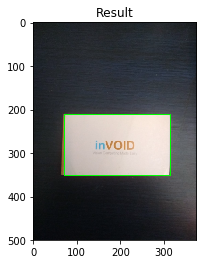

In [4]:
implt(img, t='Result')

In [5]:
#Wrap the four points of the rectangle got
warped = four_point_transform(orig, biggest.reshape(4, 2) * ratio)

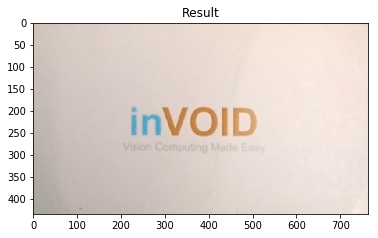

In [6]:
implt(warped, t='Result')

In [7]:
img = cv2.imread('images/img9.jpg')
ratio = img.shape[0] / 500.0
orig = img.copy()
img = imutils.resize(img, height = 500)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
invGamma = 1.0 / 0.3
table = np.array([((i / 255.0) ** invGamma) * 255
for i in np.arange(0, 256)]).astype("uint8")
gray = cv2.LUT(gray, table)
ret,thresh1 = cv2.threshold(gray,50,255,cv2.THRESH_BINARY)
_, contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [8]:
indexReturn, biggest = biggestRectangle(contours)
x,y,w,h = cv2.boundingRect(contours[indexReturn])
cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

array([[[22, 15, 16],
        [19, 13, 14],
        [19, 13, 14],
        ...,
        [ 8,  8,  8],
        [ 7,  7,  7],
        [10, 10, 10]],

       [[22, 15, 16],
        [18, 12, 13],
        [19, 13, 14],
        ...,
        [ 8,  8,  8],
        [ 9,  9,  9],
        [ 8,  8,  8]],

       [[21, 15, 16],
        [18, 12, 13],
        [16, 11, 12],
        ...,
        [ 8,  8,  8],
        [ 6,  6,  6],
        [ 7,  7,  7]],

       ...,

       [[40, 34, 35],
        [45, 39, 40],
        [46, 40, 41],
        ...,
        [68, 66, 66],
        [73, 71, 71],
        [73, 71, 71]],

       [[40, 34, 35],
        [43, 37, 38],
        [43, 37, 38],
        ...,
        [69, 67, 66],
        [72, 70, 69],
        [73, 71, 70]],

       [[46, 40, 41],
        [51, 45, 46],
        [49, 43, 44],
        ...,
        [73, 71, 70],
        [72, 70, 69],
        [70, 68, 67]]], dtype=uint8)

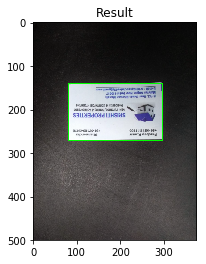

In [9]:
implt(img, t='Result')

In [10]:
#Wrap the four points of the rectangle got
warped = four_point_transform(orig, biggest.reshape(4, 2) * ratio)

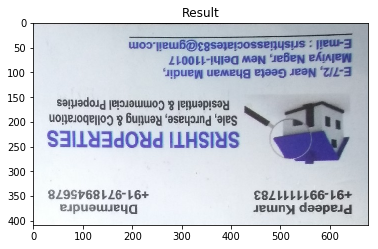

In [11]:
implt(warped, t='Result')

In [12]:
img = cv2.imread('images/img10.jpg')
ratio = img.shape[0] / 500.0
orig = img.copy()
img = imutils.resize(img, height = 500)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
invGamma = 1.0 / 0.3
table = np.array([((i / 255.0) ** invGamma) * 255
for i in np.arange(0, 256)]).astype("uint8")
gray = cv2.LUT(gray, table)
ret,thresh1 = cv2.threshold(gray,50,255,cv2.THRESH_BINARY)
_, contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [13]:
indexReturn, biggest = biggestRectangle(contours)
x,y,w,h = cv2.boundingRect(contours[indexReturn])
cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

array([[[24, 31, 40],
        [24, 31, 40],
        [22, 29, 38],
        ...,
        [29, 24, 23],
        [28, 23, 23],
        [31, 25, 26]],

       [[24, 31, 40],
        [24, 30, 39],
        [22, 28, 37],
        ...,
        [28, 23, 22],
        [27, 21, 22],
        [28, 22, 23]],

       [[26, 31, 40],
        [27, 32, 41],
        [23, 28, 37],
        ...,
        [28, 23, 22],
        [29, 23, 24],
        [29, 23, 24]],

       ...,

       [[13, 12, 13],
        [15, 14, 16],
        [15, 14, 16],
        ...,
        [18, 16, 16],
        [20, 18, 17],
        [16, 14, 13]],

       [[13, 13, 13],
        [15, 15, 15],
        [16, 16, 17],
        ...,
        [18, 16, 15],
        [20, 18, 17],
        [20, 19, 17]],

       [[14, 15, 13],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [19, 17, 16],
        [19, 17, 15],
        [20, 19, 15]]], dtype=uint8)

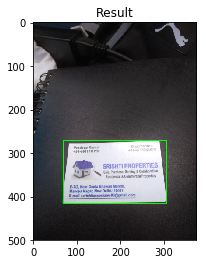

In [14]:
implt(img, t='Result')

In [15]:
#Wrap the four points of the rectangle got
warped = four_point_transform(orig, biggest.reshape(4, 2) * ratio)

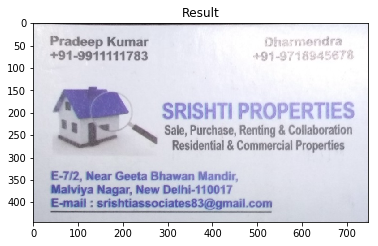

In [16]:
implt(warped, t='Result')

In [17]:
img = cv2.imread('images/img11.jpg')
ratio = img.shape[0] / 500.0
orig = img.copy()
img = imutils.resize(img, height = 500)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
invGamma = 1.0 / 0.3
table = np.array([((i / 255.0) ** invGamma) * 255
for i in np.arange(0, 256)]).astype("uint8")
gray = cv2.LUT(gray, table)
ret,thresh1 = cv2.threshold(gray,50,255,cv2.THRESH_BINARY)
_, contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [18]:
indexReturn, biggest = biggestRectangle(contours)
x,y,w,h = cv2.boundingRect(contours[indexReturn])
cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

array([[[ 17,  15,  74],
        [ 12,  11,  69],
        [ 14,  13,  69],
        ...,
        [ 19,  14,  75],
        [ 18,  12,  72],
        [ 17,  11,  70]],

       [[ 13,  12,  69],
        [ 12,  11,  68],
        [ 16,  15,  71],
        ...,
        [ 22,  17,  78],
        [ 21,  15,  76],
        [ 20,  14,  73]],

       [[ 11,  13,  68],
        [  8,  10,  65],
        [ 13,  14,  69],
        ...,
        [ 17,  14,  74],
        [ 18,  14,  74],
        [ 19,  15,  74]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [149, 150, 148],
        ...,
        [153, 150, 149],
        [153, 149, 148],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [151, 152, 150],
        ...,
        [154, 150, 149],
        [154, 149, 147],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]]

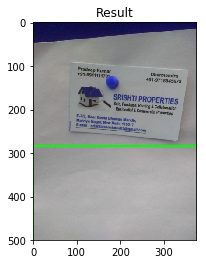

In [19]:
implt(img, t='Result')

In [20]:
#Wrap the four points of the rectangle got
warped = four_point_transform(orig, biggest.reshape(4, 2) * ratio)

ValueError: cannot reshape array of size 6 into shape (4,2)

In [21]:
img = cv2.imread('images/img15.jpg')
ratio = img.shape[0] / 500.0
orig = img.copy()
img = imutils.resize(img, height = 500)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
invGamma = 1.0 / 0.3
table = np.array([((i / 255.0) ** invGamma) * 255
for i in np.arange(0, 256)]).astype("uint8")
gray = cv2.LUT(gray, table)
ret,thresh1 = cv2.threshold(gray,50,255,cv2.THRESH_BINARY)
_, contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [22]:
indexReturn, biggest = biggestRectangle(contours)
x,y,w,h = cv2.boundingRect(contours[indexReturn])
cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

array([[[ 18,  15,  17],
        [ 18,  16,  18],
        [ 16,  16,  18],
        ...,
        [ 17,  18,  28],
        [ 18,  20,  30],
        [ 18,  20,  30]],

       [[ 19,  16,  18],
        [ 17,  14,  16],
        [ 15,  15,  17],
        ...,
        [ 14,  17,  24],
        [ 16,  19,  26],
        [ 17,  21,  28]],

       [[ 19,  17,  19],
        [ 15,  13,  15],
        [ 13,  13,  15],
        ...,
        [ 15,  19,  23],
        [ 15,  20,  24],
        [ 18,  22,  26]],

       ...,

       [[ 79,  84,  86],
        [ 87,  92,  94],
        [ 85,  90,  92],
        ...,
        [112, 114, 115],
        [116, 118, 119],
        [118, 120, 121]],

       [[ 82,  88,  91],
        [ 86,  91,  94],
        [ 85,  90,  93],
        ...,
        [111, 113, 115],
        [112, 114, 115],
        [114, 116, 117]],

       [[ 85,  92,  95],
        [ 84,  90,  93],
        [ 85,  90,  93],
        ...,
        [114, 116, 118],
        [114, 116, 117],
        [115, 117, 118]]

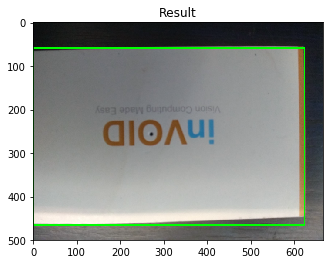

In [23]:
implt(img, t='Result')

In [24]:
#Wrap the four points of the rectangle got
warped = four_point_transform(orig, biggest.reshape(4, 2) * ratio)

ValueError: cannot reshape array of size 6 into shape (4,2)

In [25]:
img = cv2.imread('images/img16.jpg')
ratio = img.shape[0] / 500.0
orig = img.copy()
img = imutils.resize(img, height = 500)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
invGamma = 1.0 / 0.3
table = np.array([((i / 255.0) ** invGamma) * 255
for i in np.arange(0, 256)]).astype("uint8")
gray = cv2.LUT(gray, table)
ret,thresh1 = cv2.threshold(gray,50,255,cv2.THRESH_BINARY)
_, contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [26]:
indexReturn, biggest = biggestRectangle(contours)
x,y,w,h = cv2.boundingRect(contours[indexReturn])
cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

array([[[58, 52, 41],
        [60, 53, 43],
        [59, 53, 44],
        ...,
        [16, 17, 21],
        [17, 18, 22],
        [17, 18, 22]],

       [[55, 48, 40],
        [56, 50, 41],
        [56, 50, 42],
        ...,
        [15, 16, 20],
        [16, 17, 21],
        [16, 17, 21]],

       [[57, 50, 44],
        [56, 50, 44],
        [56, 50, 44],
        ...,
        [15, 16, 20],
        [15, 16, 20],
        [14, 15, 19]],

       ...,

       [[63, 67, 68],
        [60, 64, 65],
        [51, 54, 56],
        ...,
        [21, 24, 33],
        [17, 21, 27],
        [14, 18, 22]],

       [[62, 66, 67],
        [62, 66, 67],
        [52, 56, 57],
        ...,
        [17, 22, 30],
        [17, 21, 27],
        [15, 19, 24]],

       [[60, 65, 65],
        [59, 63, 64],
        [55, 59, 60],
        ...,
        [15, 20, 28],
        [16, 21, 28],
        [17, 21, 26]]], dtype=uint8)

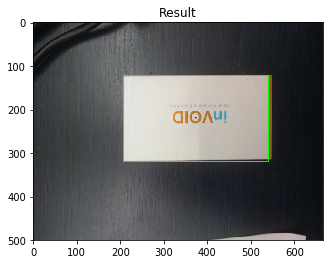

In [27]:
implt(img, t='Result')

In [28]:
#Wrap the four points of the rectangle got
warped = four_point_transform(orig, biggest.reshape(4, 2) * ratio)

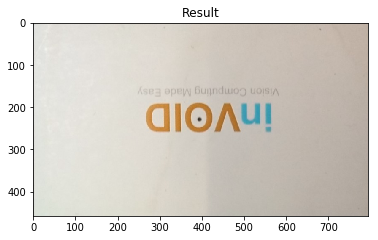

In [29]:
implt(warped, t='Result')

In [30]:
img = cv2.imread('images/img5.jpg')
ratio = img.shape[0] / 500.0
orig = img.copy()
img = imutils.resize(img, height = 500)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
invGamma = 1.0 / 0.3
table = np.array([((i / 255.0) ** invGamma) * 255
for i in np.arange(0, 256)]).astype("uint8")
gray = cv2.LUT(gray, table)
ret,thresh1 = cv2.threshold(gray,50,255,cv2.THRESH_BINARY)
_, contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [31]:
indexReturn, biggest = biggestRectangle(contours)
x,y,w,h = cv2.boundingRect(contours[indexReturn])
cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

array([[[100, 126, 132],
        [101, 127, 134],
        [102, 128, 135],
        ...,
        [ 97, 111, 125],
        [ 96, 110, 124],
        [ 95, 110, 123]],

       [[ 99, 125, 132],
        [102, 128, 135],
        [102, 128, 136],
        ...,
        [ 95, 111, 124],
        [ 94, 110, 123],
        [ 95, 111, 124]],

       [[100, 126, 133],
        [101, 127, 135],
        [101, 127, 136],
        ...,
        [ 96, 112, 125],
        [ 94, 110, 123],
        [ 95, 111, 124]],

       ...,

       [[ 45,  62,  81],
        [ 46,  63,  82],
        [ 49,  64,  83],
        ...,
        [  8,  10,  10],
        [  7,   9,   9],
        [  6,   8,   8]],

       [[ 46,  64,  83],
        [ 47,  64,  83],
        [ 47,  63,  82],
        ...,
        [  7,   9,   9],
        [  6,   8,   8],
        [  8,  10,  10]],

       [[ 47,  67,  85],
        [ 49,  66,  85],
        [ 47,  64,  83],
        ...,
        [  7,   9,   9],
        [  6,   8,   8],
        [  8,  10,  10]]

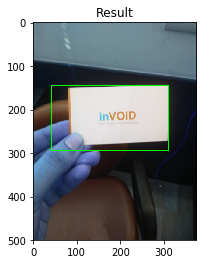

In [32]:
implt(img, t='Result')

In [33]:
#Wrap the four points of the rectangle got
warped = four_point_transform(orig, biggest.reshape(4, 2) * ratio)

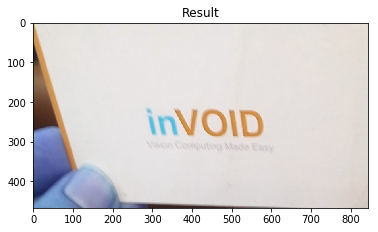

In [34]:
implt(warped, t='Result')

In [35]:
img = cv2.imread('images/img6.jpg')
ratio = img.shape[0] / 500.0
orig = img.copy()
img = imutils.resize(img, height = 500)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
invGamma = 1.0 / 0.3
table = np.array([((i / 255.0) ** invGamma) * 255
for i in np.arange(0, 256)]).astype("uint8")
gray = cv2.LUT(gray, table)
ret,thresh1 = cv2.threshold(gray,50,255,cv2.THRESH_BINARY)
_, contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [36]:
indexReturn, biggest = biggestRectangle(contours)
x,y,w,h = cv2.boundingRect(contours[indexReturn])
cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [ 33,  47,  43],
        [ 35,  46,  42],
        [ 37,  46,  40]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [ 32,  46,  42],
        [ 34,  45,  42],
        [ 36,  45,  42]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [ 69, 118, 247],
        ...,
        [ 31,  43,  41],
        [ 31,  45,  41],
        [ 32,  44,  41]],

       ...,

       [[ 16,  28,  52],
        [ 17,  27,  51],
        [ 18,  28,  52],
        ...,
        [  6,  10,  15],
        [  6,  10,  15],
        [  6,  10,  15]],

       [[ 14,  26,  50],
        [ 17,  27,  51],
        [ 17,  27,  51],
        ...,
        [  5,   9,  14],
        [  5,   9,  14],
        [  6,  10,  15]],

       [[ 14,  26,  50],
        [ 17,  28,  52],
        [ 17,  27,  51],
        ...,
        [  5,   9,  14],
        [  6,  10,  15],
        [  5,   9,  14]]

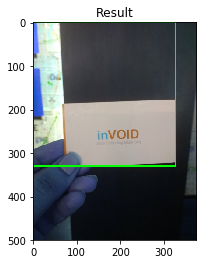

In [37]:
implt(img, t='Result')

In [38]:
#Wrap the four points of the rectangle got
warped = four_point_transform(orig, biggest.reshape(4, 2) * ratio)

ValueError: cannot reshape array of size 6 into shape (4,2)

In [39]:
img = cv2.imread('images/img7.jpg')
ratio = img.shape[0] / 500.0
orig = img.copy()
img = imutils.resize(img, height = 500)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
invGamma = 1.0 / 0.3
table = np.array([((i / 255.0) ** invGamma) * 255
for i in np.arange(0, 256)]).astype("uint8")
gray = cv2.LUT(gray, table)
ret,thresh1 = cv2.threshold(gray,50,255,cv2.THRESH_BINARY)
_, contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [40]:
indexReturn, biggest = biggestRectangle(contours)
x,y,w,h = cv2.boundingRect(contours[indexReturn])
cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

array([[[121, 120, 158],
        [121, 120, 155],
        [125, 124, 156],
        ...,
        [109, 114, 113],
        [108, 113, 112],
        [107, 112, 111]],

       [[ 96,  91, 109],
        [ 95,  90, 107],
        [ 97,  92, 107],
        ...,
        [107, 112, 111],
        [108, 113, 111],
        [106, 111, 110]],

       [[ 87,  82,  84],
        [ 89,  83,  86],
        [ 88,  83,  85],
        ...,
        [112, 117, 115],
        [111, 116, 114],
        [112, 117, 115]],

       ...,

       [[ 53,  65,  53],
        [ 50,  62,  50],
        [ 50,  62,  50],
        ...,
        [  5,   7,   7],
        [  5,   7,   7],
        [  6,   8,   8]],

       [[ 53,  65,  53],
        [ 51,  63,  51],
        [ 52,  64,  52],
        ...,
        [  6,   8,   8],
        [  5,   7,   7],
        [  7,   9,   9]],

       [[ 52,  64,  52],
        [ 56,  68,  56],
        [ 54,  66,  54],
        ...,
        [  5,   7,   7],
        [  6,   8,   8],
        [  6,   8,   8]]

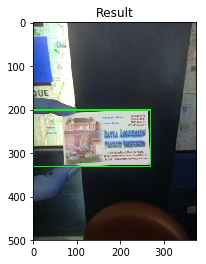

In [41]:
implt(img, t='Result')

In [42]:
#Wrap the four points of the rectangle got
warped = four_point_transform(orig, biggest.reshape(4, 2) * ratio)

ValueError: cannot reshape array of size 4 into shape (4,2)

In [43]:
img = cv2.imread('images/img8.jpg')
ratio = img.shape[0] / 500.0
orig = img.copy()
img = imutils.resize(img, height = 500)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
invGamma = 1.0 / 0.3
table = np.array([((i / 255.0) ** invGamma) * 255
for i in np.arange(0, 256)]).astype("uint8")
gray = cv2.LUT(gray, table)
ret,thresh1 = cv2.threshold(gray,50,255,cv2.THRESH_BINARY)
_, contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [44]:
indexReturn, biggest = biggestRectangle(contours)
x,y,w,h = cv2.boundingRect(contours[indexReturn])
cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

array([[[ 78, 134, 253],
        [ 79, 136, 253],
        [ 83, 137, 254],
        ...,
        [116, 120, 109],
        [112, 118, 108],
        [111, 118, 110]],

       [[ 76, 133, 252],
        [ 77, 133, 250],
        [ 81, 135, 252],
        ...,
        [110, 113, 104],
        [106, 111, 104],
        [104, 111, 106]],

       [[ 74, 132, 251],
        [ 77, 134, 251],
        [ 79, 135, 251],
        ...,
        [106, 107, 102],
        [103, 106, 103],
        [101, 107, 106]],

       ...,

       [[ 58,  76,  62],
        [ 59,  78,  64],
        [ 58,  76,  62],
        ...,
        [  9,  11,  10],
        [  7,  10,   8],
        [  8,  11,   9]],

       [[ 56,  75,  60],
        [ 59,  78,  63],
        [ 60,  79,  64],
        ...,
        [  9,  12,  11],
        [  7,  10,   8],
        [  8,  11,   9]],

       [[ 56,  75,  60],
        [ 58,  77,  62],
        [ 58,  77,  62],
        ...,
        [  8,  11,  10],
        [  8,  11,   9],
        [  8,  11,   9]]

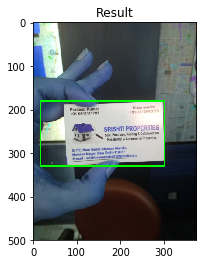

In [45]:
implt(img, t='Result')

In [47]:
#Wrap the four points of the rectangle got
warped = four_point_transform(orig, biggest.reshape(4, 2) * ratio)

ValueError: cannot reshape array of size 6 into shape (4,2)